# 一、什么是决策树？

* 决策树是机器学习中一个非常经典的算法，它易于理解，可解释性强 。

*  决策树这样一种思路在我们生活中并不少见，甚至很多时候不知不觉中使用这种思路来进行我们的判断和决策



+ 举个简单例子 ，一个相亲见面的例子

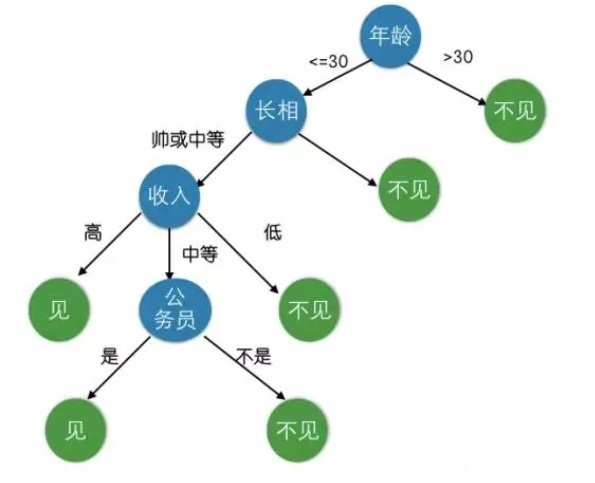

In [14]:
from IPython.display import Image
Image(filename = 'F:/picture/1.jpg')

决策树的决策过程就是基于树结构来进行决策

决策树：从根节点开始一步步走到叶节点（决策），最终归为某个类别，如果用于分类问题，称为分类树；如果用于回归问题，称为回归树


### 直接使用sklearn 包装决策树算法进行具体分类，加深了解决策树分类的算法

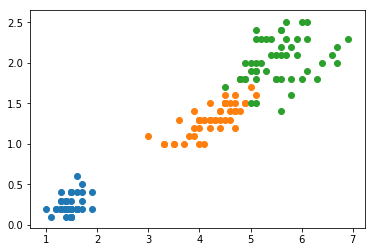

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:, 2:]
y = iris.target
df_clf = DecisionTreeClassifier(max_depth =2 ,criterion = 'entropy')
df_clf.fit(x,y)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()
# 决策树决策边界可视化

### 决策树决策边界可视化

d:\python_intepreter\python3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


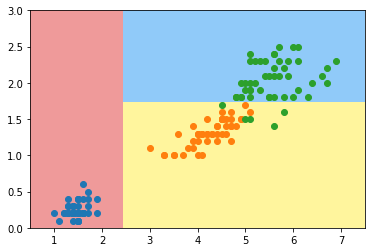

In [3]:
def plot_decision_boundary(model,axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap = custom_cmap)

plot_decision_boundary(df_clf,axis=[0.5,7.5,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

### 决策树可视化

d:\python_intepreter\python3\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


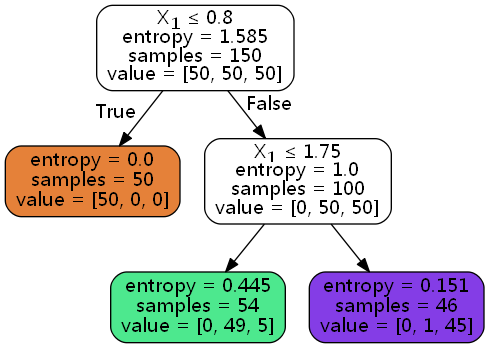

In [38]:
# %%
#决策树可视化
# coding:utf-8 
df_clf1 = DecisionTreeClassifier()
df_clf1.fit(x,y)
from sklearn.externals.six import StringIO
import pydotplus as pydot
from IPython.display import Image as image

tree.export_graphviz(df_clf1,
filled=True, rounded=True,
special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue().replace('helvetica','"Microsoft YaHei"'))
image(graph.create_png())

In [34]:
df_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

当数据小于2.45时就分为A，如果大于2.4继续进行分支，当这部分的样本y小于1.8时就分为B，如果大于1.8就分为C。
这个决策树总共的深度为2，

<b>但是这个决策依据是如何得出来的？又该在哪个维度哪个值进行划分？如何构造决策树？
   

## 二、如何构造决策树

* <b>特征的选择
* 生成决策树
* 决策树剪枝

（1）特征选择：


   特征选择表示从众多的特征中选择一个特征作为当前节点分裂的标准


   * 如ID3（通过信息增益选择特征）
   * C4.5（通过信息增益比选择特征）
   * CART（通过Gini指数选择特征）

### 信息熵

熵在信息论中表示随机变量不确定性的度量，由香农提出，熵越大，数据不确定越大，数据越混乱，
；熵越小，不确定性越低，数据越区域统一，计算公式如下

$$ H(X) = E(I(X))=-\sum_{i \to 1}(pi*logpi),i=1,2.......,n $$

### 信息量是对信息的度量，信息大小与随机事件发生的概率有关

  举例： 有两个事件a,b I(a)、I(b)分别表示事件啊，b发生的信息量,a事件发生的概率为p(a),b事件发生的概率为p(b)
 *  0<p(a)<p(b)<1,I(a)>I(b）
 *  p(a) = 0 ,I(a)-- > ∞ 
 *  p(a) = 1, I(a)= 0 
  
两个独立事件的联合信息量 为各自信息量之和
  I(a,b) = I(a)+I(b)
  
  1. $$ p(a,b) = p(a)*p(b) $$
  
  2. $$ -log(p(a,b)) = -log(p(a)) -log(p(b)) $$
  
  3. $$ I(a) = -logp(a) $$
  
  
 信息熵：平均信息量，即随机变量的期望
 
 
 
  离散型随机变量X的取值为 $$ X_1,X_2,X_3,....X_n $$
  
  X对应取值的概率
       $$ p(X_1),p(X_2),p（X_3）,....p(X_n) $$
       
  随机变量期望
  
 $$ E(X)=X_1*p(X_1)*X_2* p(X_2)....X_n* p(X_n)= \sum_{i \to 1}X_i* p(X_i) $$

 练习


A集[1，1，2]

B集[1，2，3]

计算一下A与B信息熵？

### 条件熵

在已知随机变量X的条件下，随机变量Y的条件熵H(Y|X)定义为

$$ H(X|Y) = \sum_{i \to 1}^n(pi*H(X|Y = y_i)),其中，pi = P(Y = y_i)$$

### 信息增益

信息增益表示 ：由于得知特征X的信息后数据集Y的分类不确定性减少的程度，
定义为：

$$ I(X,Y) = Gain(X,Y) = H(X) - H(X|Y)$$

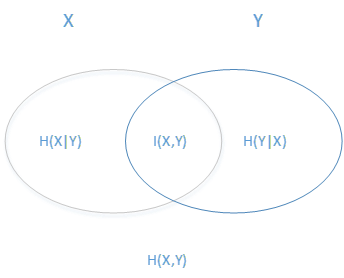

计算信息增益例子

比如我们有15个样本D,输出为0或者1. 其中9个输出为1,6个输出为0. 样本中有个特征A，取值为A1,A2,A3。A1{1,1,1,0,0}, A2{1,1,0,0,0},A3(1,1,1,1,0)


样本D的熵为：$$ H(D)= -(9/ 15log_29/15+ 6/15log_26/15) = 0.971$$

样本D在一直特征A下的条件熵为：$$ H（D|A） = 5/15H(D1)+5/15H(D2)+5/15H(D3) $$
$$ = -5/15(3/5log_23/5+ 2/5log_2/5)-5/15(2/5log_22/5+ 3/5log_3/5)-5/15(4/5log_24/5+ 1/5log_1/5) =0.888 $$

对应的信息增益为 $$ I(D,A) = H（D）-H(D/A) = 0.083$$

对应的信息增益比为 $$ gr(D|A) = I(D/A)/H_A(D)$$

决策树ID3算法思路就是用信息增益大小来判断ID3算法就是用信息增益大小来判断当前节点应该用什么特征来构建决策树，用计算出的信息增益最大的特征来建立决策树的当前节点

该算法不足：
1 不能处理连续特征
2、存在偏向于选择取值较多的特征的问题

### 信息增益比

决策树C4.5算法的改进

- 针对ID3遗留下的问题一，将连续特征离散化，

比如m个样本的连续特征A有m个，从小到大排列为$$ a1,a2,...,am$$,则C4.5取相邻两样本值的平均数，一共取得m-1个划分点，其中第i个划分点Ti表示为：$$Ti=(ai+ai)/2$$。对于这m-1个点，分别计算以该点作为二元分类点时的信息增益。选择信息增益最大的点作为该连续特征的二元离散分类点

- 针对ID3遗留下的问题二,偏选取值较多的特征 ，引入信息增益比,信息增益和特征熵的比值
$$ I_R(D|A) = \frac{I(A，D)}{H_A(D)} $$
其中，特征A的特征熵为
$$H_{A}(D)=-\sum_{i=1}^{n}\frac{|D_i|}{|D|}log\frac{|D_i|}{|D|} $$

### 基尼系数

CART采用的就是基尼系数代替信息增益比:
假设有K个类别，样本点属于第k类的概率为$$p_k $$
则概率分布的基尼指数定义为
$$ Gini(p)=\sum_{k=1}^{K}p_{k}(1-p_k)=1-\sum_{k=1}^{K}p_{k}^{2} $$

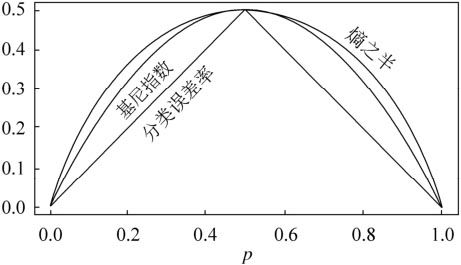

In [16]:
from IPython.display import Image
Image(filename = 'F:/picture/2.jpg')

### 决策树生成

- 从根节点开始，对结点计算所有可能特征的信息增益，选择信息增益最大的特征作为结点的特征，并由该特征的不同取值构建子节点；
- 对子节点递归地调用以上方法，构建决策树；
- 直到所有特征的信息增益均很小或者没有特征可选时为止。

### 决策树的剪枝

方法一： 当熵减少的数量小于某一个阈值时，就停止分支的创建。预剪枝。

<br>方法二：先创建完整的决策树，然后再尝试消除多余的节点。后剪枝<br>

在提高信息增益的基础上，通过对模型的复杂度T施加惩罚，得到了损失函数的：

$$ C_{\alpha}(T) = \sum_{t=1}^{|T|}N_{t}H_{t}(T)+\alpha |T| $$
t是树的叶节点，Nt表示该叶节点的样本数量，Ht（T）表示结点t上的经验熵

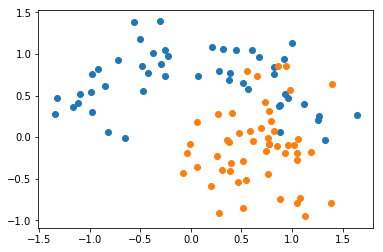

In [19]:
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn import datasets
x,y = datasets.make_moons(noise=0.25,random_state =666)

plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==0,1],x[y==1,1])
plt.show()


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x,y) #可以看到默认的参数设置

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

d:\python_intepreter\python3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


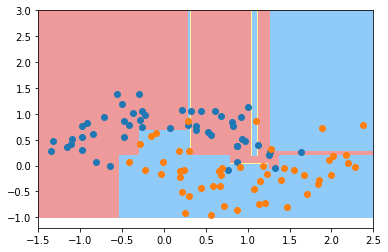

In [21]:
plot_decision_boundary(dt,axis=[-1.5,2.5,-1.0,3])  
plt.scatter(x[y==0,0],x[y==0,1])  
plt.scatter(x[y==1,0],x[y==1,1])  
plt.show()

####  决策树深度 max_depth

In [ ]:


dt = DecisionTreeClassifier(max_depth=2)  
dt.fit(x,y) 

d:\python_intepreter\python3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


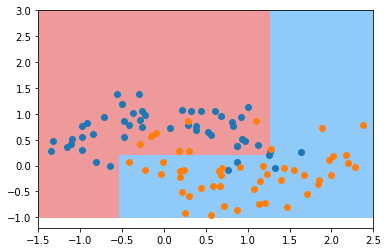

In [26]:
plot_decision_boundary(dt,axis=[-1.5,2.5,-1.0,3])  
plt.scatter(x[y==0,0],x[y==0,1])  
plt.scatter(x[y==1,0],x[y==1,1])  
plt.show()

####  设置最小划分的样本数 min_samples_split

In [28]:
dt = DecisionTreeClassifier(min_samples_split=10) #设置最小划分的样本数，如果低于这个数，将不再进一步划分 
dt.fit(x,y) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

d:\python_intepreter\python3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


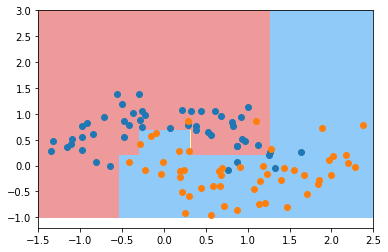

In [29]:
plot_decision_boundary(dt,axis=[-1.5,2.5,-1.0,3])  
plt.scatter(x[y==0,0],x[y==0,1])  
plt.scatter(x[y==1,0],x[y==1,1])  
plt.show()

####  设置叶子节点数量 max_leaf_node

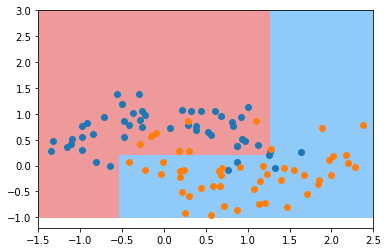

In [30]:
dt = DecisionTreeClassifier(max_leaf_nodes=4) #最多就4个叶子节点  
dt.fit(x,y) 
plot_decision_boundary(dt,axis=[-1.5,2.5,-1.0,3])  
plt.scatter(x[y==0,0],x[y==0,1])  
plt.scatter(x[y==1,0],x[y==1,1])  
plt.show()